# Marketing Bancario
---

### Introducción

El objetivo del problema es predecir (clasificar) en base a 16 atributos relacionado son la persona si la misma, acepta el producto bancario de plazo fijo.

### Atributos
Como se comento en el parrafo anterior, el dataset cuenta con **16 atributos** sin incluir a la clase de prediccion y 45211 instancias. Ahora veremos una tabla **enumerandolos** así también con su **tipo de dato** y **descripción**.

### Atributos Faltantes
Como primer paso vamos a cargar nuestro archivo y verificar si tenemos algun atributo faltante en nuestro dataset.

In [1]:
### Importamos las librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargamos el dataset
ds = pd.read_csv("../data/bank-full.csv",delimiter=';')

In [3]:
# Datos estadísticos del dataset.
ds.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
# Primeras 10 instancias del dataset
ds.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
# Vamos a ver los valores para cada atributo

columns = ds.columns.values.tolist()
for column_name in columns:
    print("\n####### "+str(column_name)+" #######")
    print(ds[column_name].unique())
    


####### age #######
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

####### job #######
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

####### marital #######
['married' 'single' 'divorced']

####### education #######
['tertiary' 'secondary' 'unknown' 'primary']

####### default #######
['no' 'yes']

####### balance #######
[ 2143    29     2 ...  8205 14204 16353]

####### housing #######
['yes' 'no']

####### loan #######
['no' 'yes']

####### contact #######
['unknown' 'cellular' 'telephone']

####### day #######
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

####### month #######
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr

Como podemos ver en algunos atributos tenemos el valor "unknown" esto significa que es desconocido
pero es válido en nuestro dataset y no cuenta como valor faltante.

### Correlacion entre atributos

Ahora vamos a chequear la correlacion entre los atributos y a graficar la matriz de correlación.    

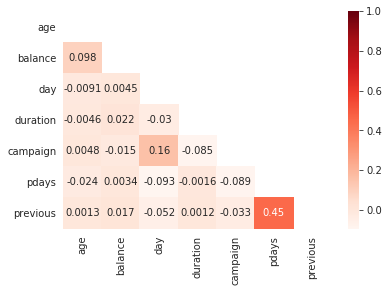

In [6]:
correlation=ds.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(correlation, mask=mask,cmap="Reds",annot=True)

Como podemos ver no tenemos ningun atributo con una correlación importante.

### Outliers

Vamos a obtener los percentiles

In [7]:
ds.quantile([0.25,0.5,0.75,0.95])

,age,balance,day,duration,campaign,pdays,previous
0.25,33.0,72.0,8.0,103.0,1.0,-1.0,0.0
0.50,39.0,448.0,16.0,180.0,2.0,-1.0,0.0
0.75,48.0,1428.0,21.0,319.0,3.0,-1.0,0.0
0.95,59.0,5768.0,29.0,751.0,8.0,317.0,3.0



####### age #######


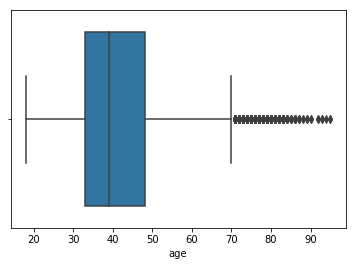


####### balance #######


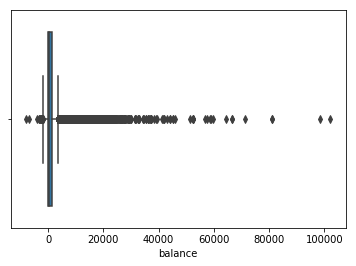


####### day #######


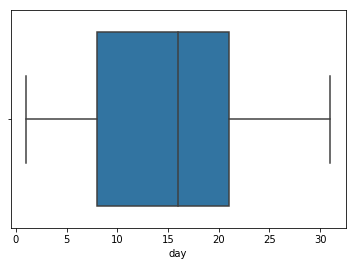


####### campaign #######


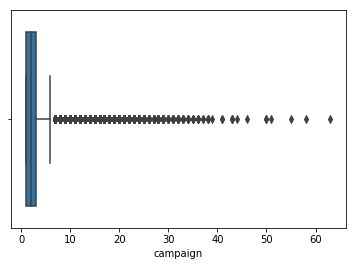


####### pdays #######


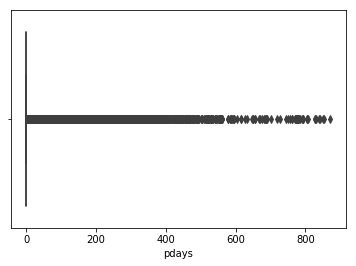


####### previous #######


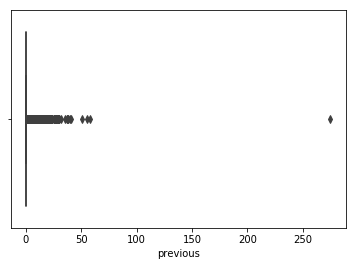

In [8]:
def printBoxplot(dataset):
    columns = dataset.columns.values.tolist()
    for column_name in columns:
        print("\n####### "+str(column_name)+" #######")
        sns.boxplot(dataset[column_name])
        plt.show()

dsFiltered=ds[['age','balance','day','campaign','pdays','previous']]
printBoxplot(dsFiltered)

In [9]:
ds.quantile([0.25,0.5,0.75,0.95])

,age,balance,day,duration,campaign,pdays,previous
0.25,33.0,72.0,8.0,103.0,1.0,-1.0,0.0
0.50,39.0,448.0,16.0,180.0,2.0,-1.0,0.0
0.75,48.0,1428.0,21.0,319.0,3.0,-1.0,0.0
0.95,59.0,5768.0,29.0,751.0,8.0,317.0,3.0



####### age #######


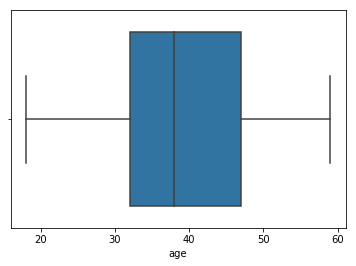


####### balance #######


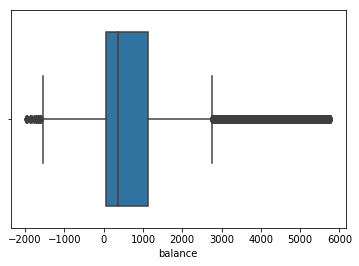


####### day #######


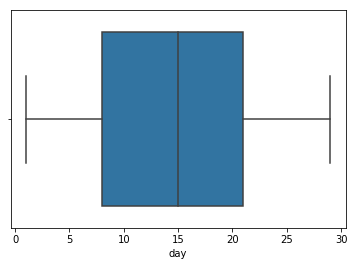


####### campaign #######


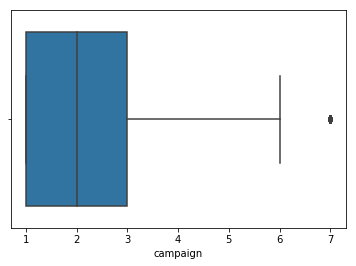


####### pdays #######


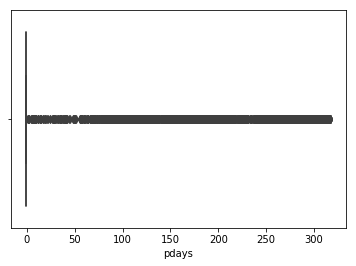


####### previous #######


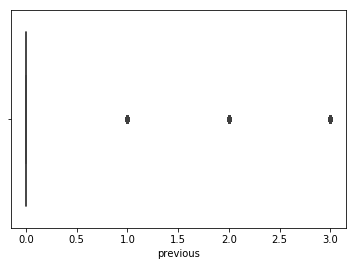

In [10]:
# Modifico el dataset Original
ds = ds[ds.age < 60]
ds = ds[ds.balance < 5769]
ds = ds[ds.balance > -2000]
ds = ds[ds.day < 30]
ds = ds[ds.duration < 752]
ds = ds[ds.campaign < 8]
ds = ds[ds.pdays < 318]
ds = ds[ds.previous < 4]

dsFiltered=ds[['age','balance','day','campaign','pdays','previous']]

printBoxplot(dsFiltered)

In [11]:
#Ahora vamos a convertir todos nuestros atributos categoricos a numericos
ds=pd.get_dummies(data=ds,columns=['job','marital','education','default','balance','housing','loan','contact','month','poutcome','y'],drop_first=True)

#Cambiamos el nombre de nuestra Variable Objetivo de y --> CLASS
ds = ds.rename(columns={'y_yes': 'CLASS'})

#Verificamos como quedo nuestro dataset

ds.head()

,age,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,CLASS
0,58,5,261,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,44,5,151,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,5,76,1,-1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,47,5,92,1,-1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,5,198,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Normalización de los datos

In [12]:
#Importo el Normalizador de SKLearn
from sklearn.preprocessing import Normalizer

#Quito la variable de prediccion
X= np.array(ds.drop(['CLASS'],1))

#Normalizo los ajustando nuestro normalizador a 
#nuestros datos y luego aplicando la transformacion
transformer = Normalizer().fit(X)
X=transformer.transform(X)

#Verificamos la Normalización
print(X)

[[0.21687737 0.01869633 0.97594817 ... 0.         0.         0.00373927]
 [0.27955814 0.03176797 0.9593927  ... 0.         0.         0.00635359]
 [0.39724453 0.06018857 0.91486619 ... 0.         0.         0.01203771]
 ...
 [0.08596584 0.06353997 0.99421365 ... 0.         0.         0.00373765]
 [0.06456651 0.04390523 0.99690694 ... 0.         0.         0.00258266]
 [0.11143828 0.03323598 0.99316924 ... 0.         0.         0.00195506]]


### Entrenamiento y Validación del Modelo SVM

In [13]:
from sklearn.svm import LinearSVC
from sklearn import model_selection

#Me quedo con la variable de prediccion
Y = np.array(ds['CLASS'])

#Ajusto el tamaño de los datos para test
validation_size = 0.30
#Utilizo una semilla para poder reproducir el split
seed = 2018

#Hago un split para validar el modelo
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y, test_size=validation_size, random_state=seed)

#Defino el KFold
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#Defino el modelo de SVM
model = LinearSVC()

#Obtengo los resultados del entrenamiento 
results = model_selection.cross_val_score(model, X_train,Y_train, cv=kfold, scoring='accuracy')
print("#### Resultado Training ####\n")
print("Media: %f" % (results.mean()))
print("Desvio Estandar: %f" % (results.std()))

#### Resultado Training ####

Media: 0.924764
Desvio Estandar: 0.005196


### Utilizamos el Modelo para predecir

In [14]:
from sklearn.metrics import accuracy_score

#Hago la predicción
model.fit(X_train,Y_train)
predictions = model.predict(X_validation)

print("#### Accuracy Validación ####\n")
#Imprimo la el scoring de la validación
print("Accuracy: %s" % accuracy_score(Y_validation, predictions))

#### Accuracy Validación ####

Accuracy: 0.9195938244741477
